In [167]:
import tensorflow as tf
import numpy as np
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from math import floor, ceil
from pylab import rcParams
from pandas.plotting import scatter_matrix
%matplotlib inline





In [168]:
#sns.set(style='ticks', palette='Spectral', font_scale=1.5)

#material_palette = ["#4CAF50", "#2196F3", "#9E9E9E", "#FF9800", "#607D8B", "#9C27B0"]
#sns.set_palette(material_palette)
#rcParams['figure.figsize'] = 16, 8

#plt.xkcd();
#random_state = 42
#np.random.seed(random_state)
#tf.set_random_seed(random_state)

In [169]:
names= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class_']
df = pd.read_csv("iris.data.csv", sep=",",names=names)
species=[]
for index,row in df.iterrows():
    temp=row['class_']
    temp=temp[5:]
    #print(temp)
    species.append(temp)
species=pd.DataFrame(species,columns=['species'])
df=pd.concat([df,species],axis=1)
df=df.drop(['class_'],axis=1)
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [170]:
print('shape',df.shape)
print('describe',df.describe())
print(df.head())

shape (150, 5)
describe        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [171]:
#df.sepal_length.value_counts().plot(kind="bar", rot=0);print(df.groupby('class').size())
# box and whisker plots
#df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
#plt.show()
# histograms

train_y = pd.get_dummies(df.species)
#x=np.asarray(x)
#x1=pd.DataFrame(x,columns=['A','B','C'])
train_x=df.drop(['species'],axis=1)

print(train_x.head(),'\n',train_y.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2 
    setosa  versicolor  virginica
0       1           0          0
1       1           0          0
2       1           0          0
3       1           0          0
4       1           0          0


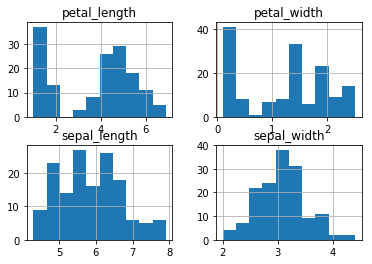

In [172]:
df.hist()
plt.show()


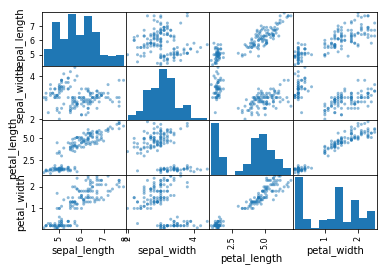

In [173]:
#scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()


In [174]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

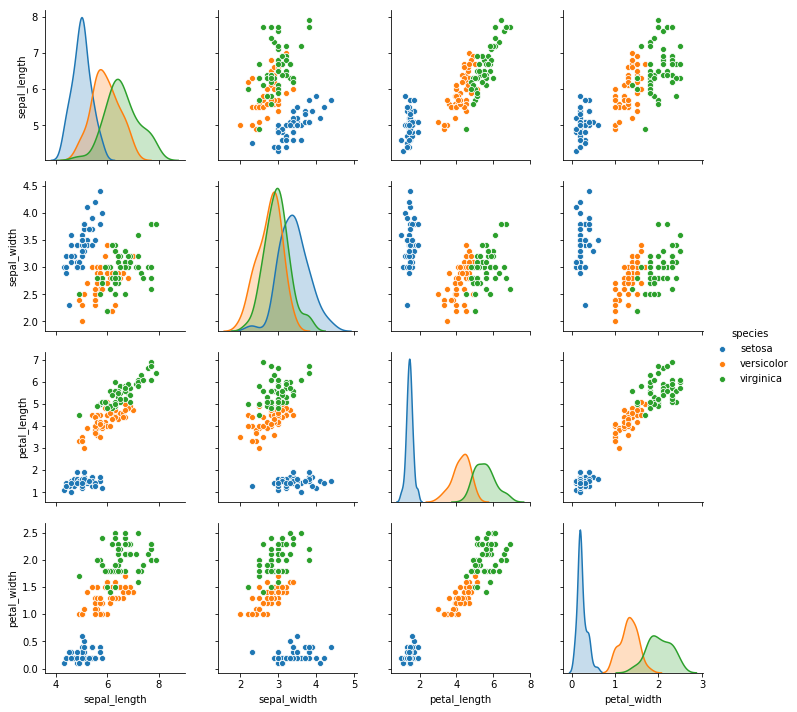

In [175]:
sns.pairplot(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width','species']],hue='species');

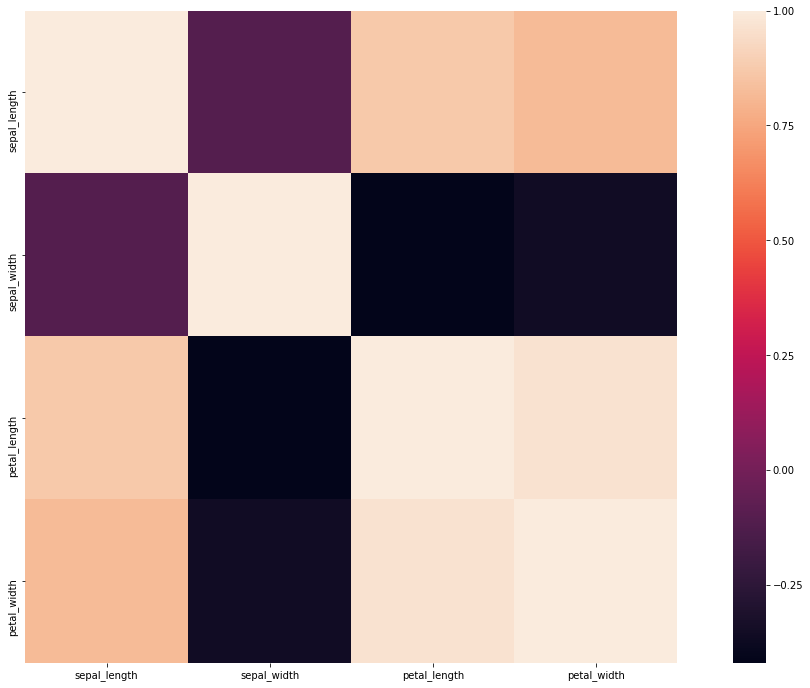

In [176]:
corr_mat = df.corr() 
fig, ax = plt.subplots(figsize=(20, 12)) 
sns.heatmap(corr_mat, vmax=1.0, square=True, ax=ax);

In [177]:
train_size = 0.9

train_cnt = floor(train_x.shape[0] * train_size)
x_train = np.asarray(train_x.iloc[0:train_cnt])#values returns ndarray
y_train = train_y.iloc[0:train_cnt].values
x_val = train_x.iloc[train_cnt:].values
y_val = train_y.iloc[train_cnt:].values

In [205]:
def multilayer_perceptron(x, weights, biases, keep_prob):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_1 = tf.nn.dropout(layer_1, keep_prob)
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    out = tf.nn.softmax(out_layer)
    return out

In [206]:
n_hidden_1 = 38
n_input = train_x.shape[1]
n_classes = train_y.shape[1]

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_hidden_1, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

keep_prob = tf.placeholder("float")

In [207]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])
x_v = tf.placeholder("float", [None, n_input])
y_v = tf.placeholder("float", [None, n_classes])

In [208]:
predictions = multilayer_perceptron(x, weights, biases, keep_prob)
predictions_val = multilayer_perceptron(x_v, weights, biases, keep_prob)

In [209]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predictions, labels=y))
cost_val = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predictions_val, labels=y_val))

In [210]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

In [211]:
# Create an optimizer.
#opt = tf.train.AdamOptimizer(learning_rate=0.1)

# Compute the gradients for a list of variables.
#grads_and_vars = opt.compute_gradients(cost)#,var_list=[weights,biases])#var_list not necessary

# grads_and_vars is a list of tuples (gradient, variable).  Do whatever you
# need to the 'gradient' part, for example cap them, etc.
#capped_grads_and_vars = [(MyCapper(gv[0]), gv[1]) for gv in grads_and_vars]

# Ask the optimizer to apply the capped gradients.
#optimizer=opt.apply_gradients(grads_and_vars)

<IPython.core.display.Javascript object>


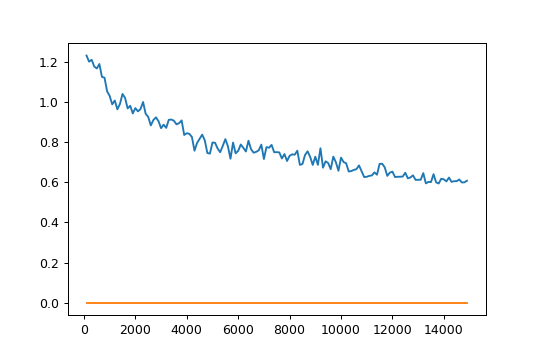

Epoch: 0001 cost= 1.250328034
Epoch: 0101 cost= 1.232690185
Epoch: 0201 cost= 1.202236474
Epoch: 0301 cost= 1.211673692
Epoch: 0401 cost= 1.177984148
Epoch: 0501 cost= 1.168167084
Epoch: 0601 cost= 1.190449744
Epoch: 0701 cost= 1.126107186
Epoch: 0801 cost= 1.122319326
Epoch: 0901 cost= 1.054569021
Epoch: 1001 cost= 1.031180888
Epoch: 1101 cost= 0.989311352
Epoch: 1201 cost= 1.008450657
Epoch: 1301 cost= 0.964558929
Epoch: 1401 cost= 0.991074383
Epoch: 1501 cost= 1.041166380
Epoch: 1601 cost= 1.021361694
Epoch: 1701 cost= 0.968936518
Epoch: 1801 cost= 0.982132524
Epoch: 1901 cost= 0.943957999
Epoch: 2001 cost= 0.970389917
Epoch: 2101 cost= 0.954235494
Epoch: 2201 cost= 0.965748221
Epoch: 2301 cost= 1.001094848
Epoch: 2401 cost= 0.942412615
Epoch: 2501 cost= 0.926737040
Epoch: 2601 cost= 0.884116620
Epoch: 2701 cost= 0.910857901
Epoch: 2801 cost= 0.924505800
Epoch: 2901 cost= 0.905514807
Epoch: 3001 cost= 0.870407835
Epoch: 3101 cost= 0.887882918
Epoch: 3201 cost= 0.871998385
Epoch: 330

In [219]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    training_epochs = 15000
    display_step = 100
    batch_size = 32
    total_batch = int(len(x_train) / batch_size)
    k=0
    total_batch = int(len(x_train) / batch_size)
    epoc_=np.zeros((total_batch*5000+1),dtype=np.float64)
    cost_=np.zeros((total_batch*5000+1),dtype=np.float64)
    cost_val_=np.zeros((total_batch*5000+1),dtype=np.float64)
    
    x_batches = np.array_split(x_train, total_batch)
    y_batches = np.array_split(y_train, total_batch)


    
    %matplotlib notebook
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ion()
    fig.show()
    fig.canvas.draw()
    
    for epoch in range(training_epochs):
        avg_cost = 0.0
        avg_cost_val=0.0
        for i in range(total_batch):
            batch_x, batch_y = x_batches[i], y_batches[i]
            
            _, c= sess.run([optimizer, cost], 
                            feed_dict={
                                x: batch_x, 
                                y: batch_y, 
                                keep_prob: 0.8
                            })
            #c_val= sess.run([cost_val], 
            #                feed_dict={
            #                    x_v: batch_x, 
            #                    y_v: batch_y, 
            #                    keep_prob: 0.8
            #                })
            avg_cost += c / total_batch
            #avg_cost_val += c_val / total_batch
        w,b=sess.run([weights,biases])
        
        if epoch % display_step == 0:
              print("Epoch:", '%04d' % (epoch+1), "cost=","{:.9f}".format(avg_cost))
              
              epoc_[k]=epoch
              cost_[k]=float(avg_cost)
              cost_val_[k]=float(avg_cost_val)
              k=k+1
              ep=epoc_[1:k]
              ct=cost_[1:k]
              ctv=cost_val_[1:k]
              ax.clear()
              ax.plot(ep,ct,ep,ctv)
              fig.canvas.draw()
    fig.canvas.draw()
              
            
              
    print("Optimization Finished!",predictions)
    correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: x_test, y: y_test, keep_prob: 1.0}))

In [249]:
predict = multilayer_perceptron(x, w, b, keep_prob)
pred = tf.argmax(predict, 1)
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  c,pred= sess.run([predict,pred], 
                            feed_dict={
                                x: x_train[100:120],  
                                keep_prob: 0.8
                            })
  

print(pred,np.argmax(y_train[100:120],1))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [244]:
#print(w,b)

In [20]:
# Load libraries
import pandas

import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [21]:
# Split-out validation dataset
array = df.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [22]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

c:\python35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python35\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python35\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.983333 (0.033333)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


c:\python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'aut